<a href="https://www.kaggle.com/code/shzark/ex-complete-file?scriptVersionId=152059884" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Capstone Project**

The project goal is to identify use differences between Member and Casual users from the Divvy Bike using the google framework for data analysis which consist in:
Ask, Prepare, Process, Analyze, Share and Act. 

**Ask**:

1 - Identify the business task:
The main problem here is to identify the difference between Memebers and Casual users from daily use of Divy Bikes.

2- Consider the stakeholders:
This can help the bussines on prepare stateges to maybe convert Casual users into Member users. 


**Prepare**:

The data was prepared downloading the monthly csv files from Divybikes website and concatenating them into one dataset with the anual information. 
It was using Python Pandas to perform all preparation of the data. 

The colums presented in the file after the merge are:

'ride_id', 'rideable_type', 'started_at', 'ended_at','start_station_name', 'start_station_id', 'end_station_name','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng','member_casual', 'start_datetime', 'end_datetime', 'start_year', 'start_month', 'start_day', 'start_hour', 'start_minute', 'start_dow', 'end_year', 'end_month', 'end_day', 'end_hour', 'end_minute', 'end_dow','travel_duration'


#Importing the necessary libs
import os
import glob
import pandas as pd

#reading all csv files on the directory
directory = os.path.join('*.csv')

#Assigning all files to a variable
files = glob.glob(directory)

# reading all csv files
df = pd.concat(map(pd.read_csv, files), ignore_index=True)

# saving the new file
newfiles = df.to_csv('divvy_bikes_2023.csv', index = None, header = True)


In [3]:
#Importing the necessary libs

import pandas as pd

In [4]:
df = pd.read_csv("/kaggle/input/divvy-bikes-2023/divvy_bikes_2023.csv")
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [5]:
#checking the information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 509.1+ MB


In [6]:
#couting the member distribution

df["member_casual"].value_counts()

member_casual
member    3224171
casual    1909115
Name: count, dtype: int64

In [7]:
#checking the empty values

df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    785003
start_station_id      785135
end_station_name      833379
end_station_id        833520
start_lat                  0
start_lng                  0
end_lat                 6401
end_lng                 6401
member_casual              0
dtype: int64

In [8]:
# % of rows missing in each column

for column in df.columns:
    percentage_na = df[column].isna().mean()
    print(f'{column}: {round(percentage_na * 100, 2)}%')

ride_id: 0.0%
rideable_type: 0.0%
started_at: 0.0%
ended_at: 0.0%
start_station_name: 15.29%
start_station_id: 15.29%
end_station_name: 16.23%
end_station_id: 16.24%
start_lat: 0.0%
start_lng: 0.0%
end_lat: 0.12%
end_lng: 0.12%
member_casual: 0.0%


In [9]:
#Change the dates colunm into datetime type so I can further analyse it

df["start_datetime"] = pd.to_datetime(df["started_at"], format = "%Y-%m-%d %H:%M:%S", errors= "coerce")

In [10]:
df["end_datetime"] = pd.to_datetime(df["ended_at"])

In [11]:
#checking the information of the data after adding datetime data. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_datetime      datetime64[ns]
 14  end_datetime        datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 587.5+ MB


In [12]:
# Adding columns for datetime analyses

#start_date
df["start_year"] = df["start_datetime"].dt.year
df["start_month"] = df["start_datetime"].dt.month
df["start_day"] = df["start_datetime"].dt.day
df["start_hour"] = df["start_datetime"].dt.hour
df["start_minute"] = df["start_datetime"].dt.minute
df["start_minute"] = df["start_datetime"].dt.minute
df["start_dow"] = df["start_datetime"].dt.day_name()
df["start_month"] = df["start_datetime"].dt.month_name()

#end_date
df["end_year"] = df["end_datetime"].dt.year
df["end_month"] = df["end_datetime"].dt.month
df["end_day"] = df["end_datetime"].dt.day
df["end_hour"] = df["end_datetime"].dt.hour
df["end_minute"] = df["end_datetime"].dt.minute
df["end_dow"] = df["end_datetime"].dt.day_name()
df["end_month"] = df["end_datetime"].dt.month_name()

#adding travel duration
df["travel_duration"] = (df["end_datetime"] - df["start_datetime"]).dt.total_seconds() / 60

In [13]:
#checking the information of the data after adding datetime data. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5133286 entries, 0 to 5133285
Data columns (total 28 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          object        
 3   ended_at            object        
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  start_datetime      datetime64[ns]
 14  end_datetime        datetime64[ns]
 15  start_year          int32         
 16  start_month         object        
 17  start_day           int32         
 18  start_hour          int32         
 19  start_minute        int32         
 20  st

In [14]:
#Selecting only the columns that will be use for the analyses
divvy = df.loc[:, ['ride_id',
                    'rideable_type',
                    'started_at',
                    'ended_at',
                    'start_station_name',
                    'end_station_name',
                    'member_casual',
                    'start_datetime',
                    'end_datetime',
                    'start_year',
                    'start_month',
                    'start_day',
                    'start_hour',
                    'start_minute',
                    'start_dow',
                    'end_year',
                    'end_month',
                    'end_day',
                    'end_hour',
                    'end_minute',
                    'end_dow',
                    'travel_duration']]


# Analyze****

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Define the global setup for plots

sns.set_theme(style="darkgrid")
width = 10
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

In [17]:
#Checking the dow frequency.  

day_count = divvy.groupby(["start_dow", "member_casual"])[["start_station_name", "end_station_name"]].value_counts().reset_index().copy()
day_count.columns = ["start_name","end_name","dow", "membership","total"]

In [18]:
day_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826025 entries, 0 to 826024
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   start_name  826025 non-null  object
 1   end_name    826025 non-null  object
 2   dow         826025 non-null  object
 3   membership  826025 non-null  object
 4   total       826025 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 31.5+ MB


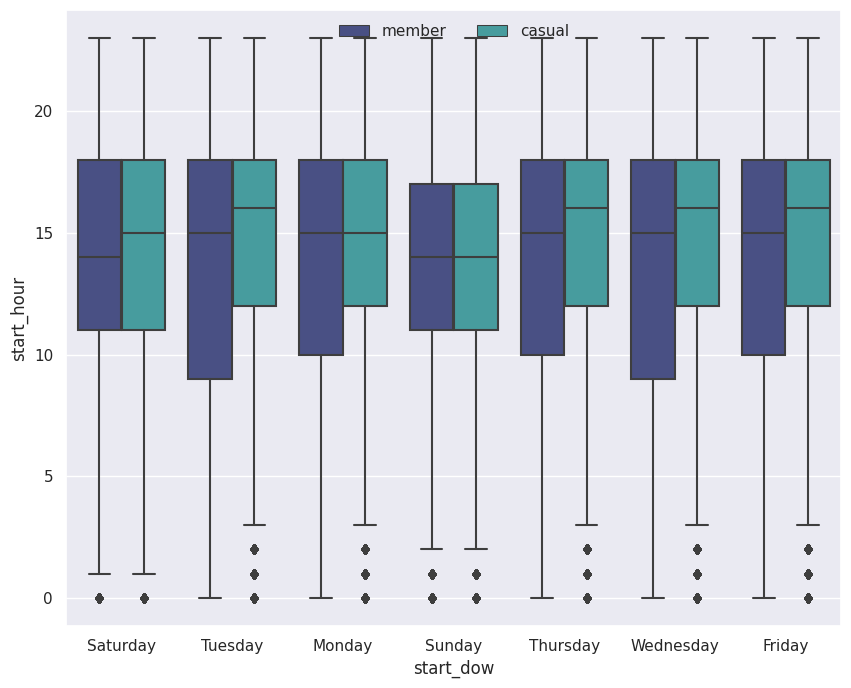

In [42]:
#checking the hour the bikes are used by members by weekdays

busiest_hour_day = sns.boxplot(data = divvy, 
                               x = "start_dow", 
                               y = "start_hour",
                               hue= "member_casual",
                               palette= "mako")
sns.move_legend(busiest_hour_day, "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)


In [20]:
# Creating a dataset with the mean time use by users.
mean_time = divvy.groupby(["start_dow", "member_casual"])[["travel_duration"]].mean().reset_index()
mean_time.columns = ["start_dow", "member_casual", "travel_duration_mean"]

<Axes: xlabel='start_dow', ylabel='travel_duration_mean'>

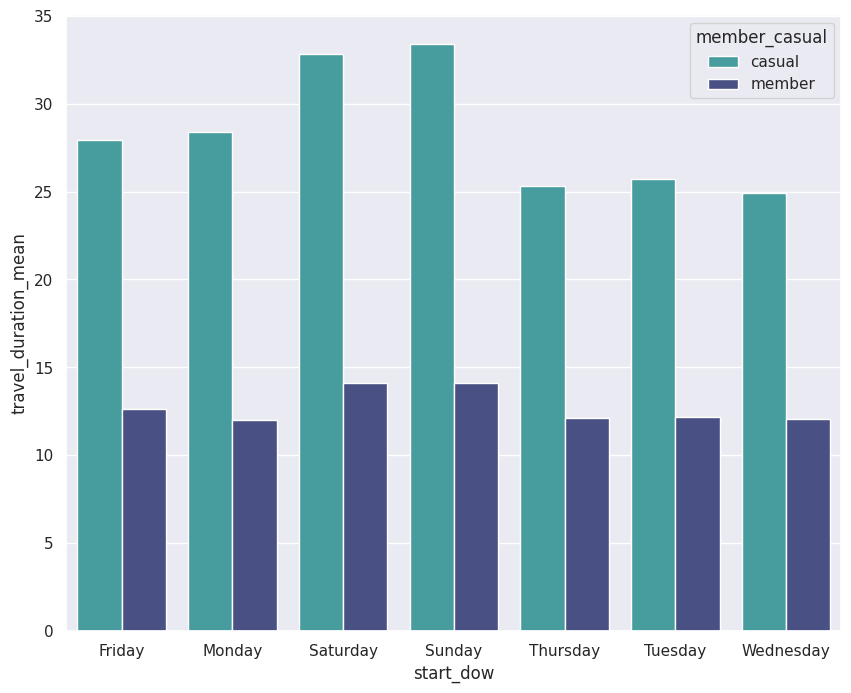

In [21]:
# Ploting the new dataset with the mean information
sns.barplot(data = mean_time,
            x = "start_dow", 
            y = "travel_duration_mean", 
            hue = "member_casual",
            palette = "mako_r")

In [22]:
# Creating a dataset with the couting of the bike by type by dow

bike_preference_dow = divvy.groupby(["start_dow", "member_casual"])[["rideable_type"]].value_counts().reset_index()
bike_preference_dow.columns = ["start_dow","member_casual", "rideable_type", "total"]

#By Month
bike_preference_month = divvy.groupby(["start_month", "member_casual"])[["rideable_type"]].value_counts().reset_index()
bike_preference_month.columns = ["start_month","member_casual", "rideable_type", "total"]


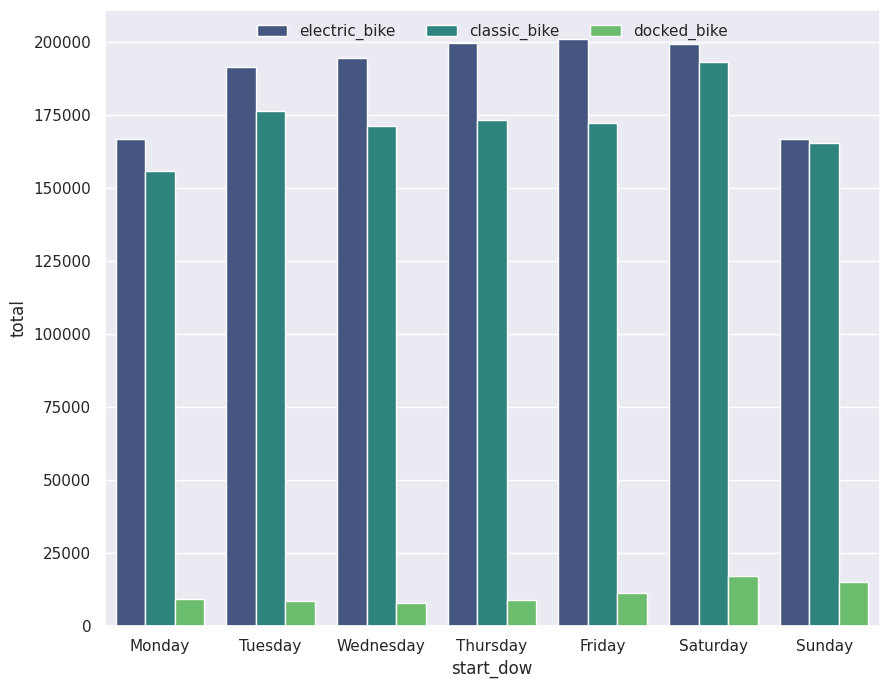

In [32]:
# Ploting the most used bike type by dow
bike_type_use = sns.barplot(data = bike_preference_dow,
                            x = "start_dow",
                            y = "total",
                            hue = "rideable_type",
                            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                            palette = "viridis",
                            errorbar= None)
sns.move_legend(bike_type_use, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

<Axes: xlabel='start_month', ylabel='total'>

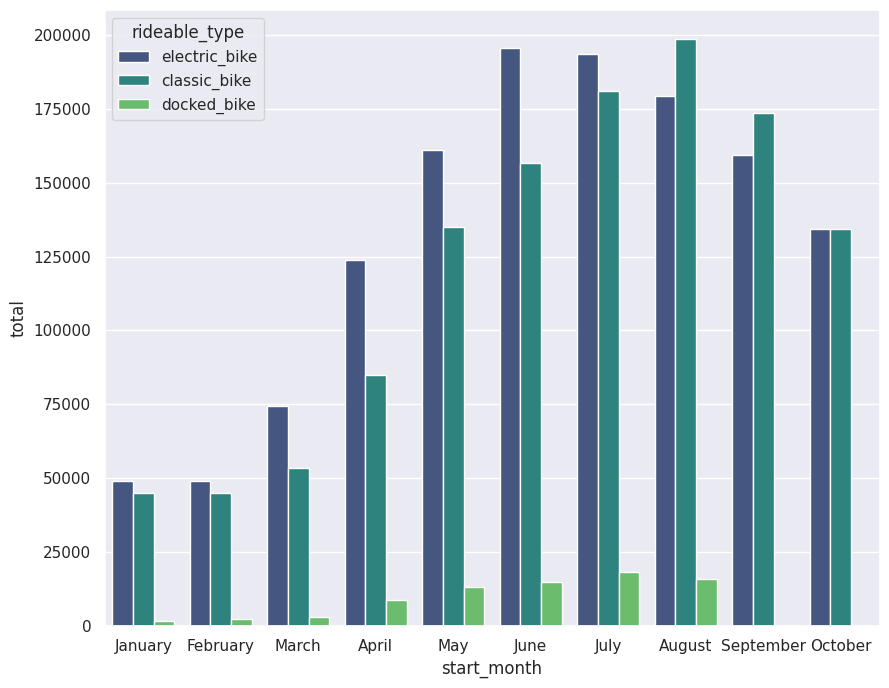

In [30]:
# Ploting the most used bike type by month
sns.barplot(data = bike_preference_month,
            x = "start_month", 
            y = "total", 
            hue = "rideable_type",
            order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
            palette = "viridis",
            errorbar = None)

<Axes: xlabel='start_dow', ylabel='total'>

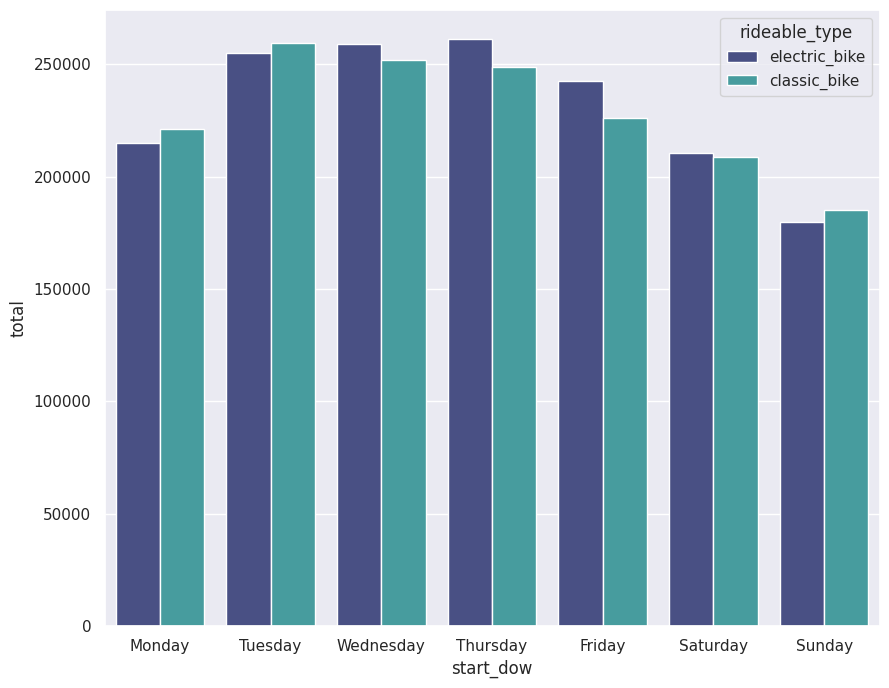

In [25]:
# Most used bikes by members by dow
sns.barplot(bike_preference_dow.query("member_casual == 'member'"),
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
            palette = "mako")


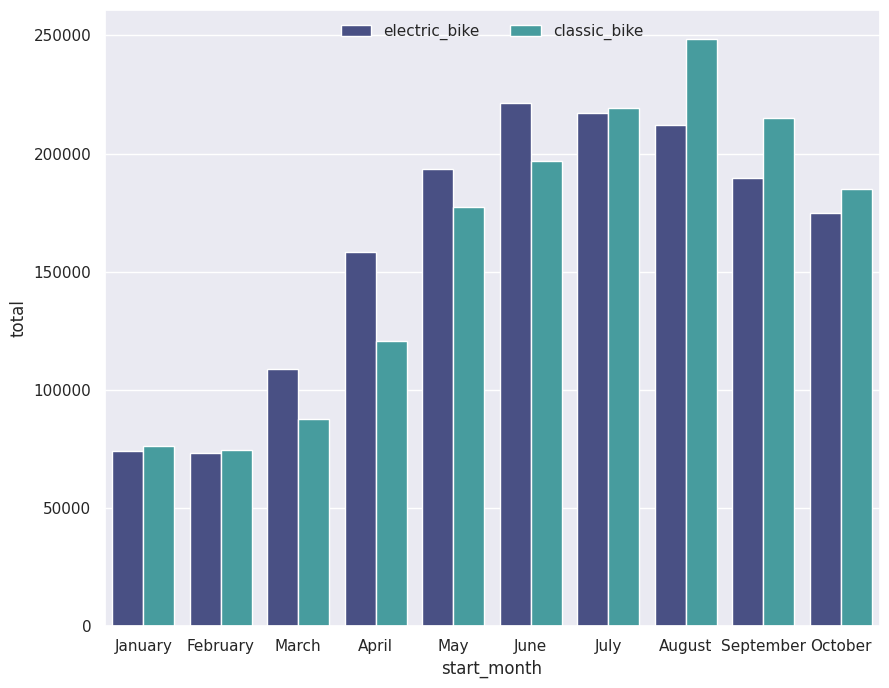

In [33]:
# Most used bikes by members by month.
prefered_bikes_membership = sns.barplot(bike_preference_month.query("member_casual == 'member'"),
                                        x = "start_month",
                                        y = "total",
                                        hue = "rideable_type",
                                        order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
                                        palette = "mako")
sns.move_legend(prefered_bikes_membership,
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)


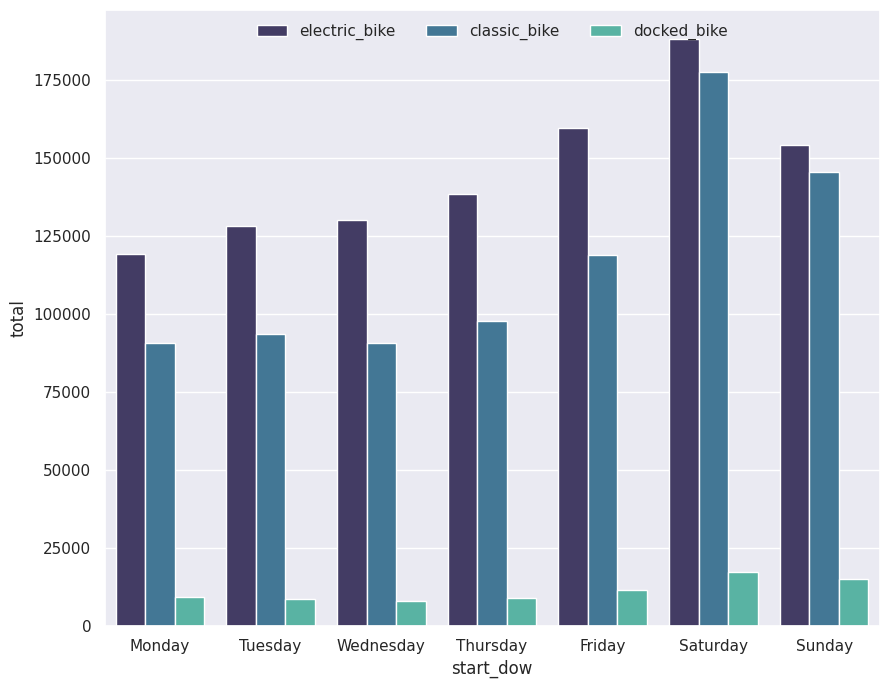

In [27]:
# Most used bikes by casuals by dow.
casual_bike_type_plot = sns.barplot(bike_preference_dow.query("member_casual == 'casual'"),
                                    x = "start_dow",
                                    y = "total", 
                                    hue = "rideable_type",
                                    order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                                    palette = "mako")
sns.move_legend(casual_bike_type_plot, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)

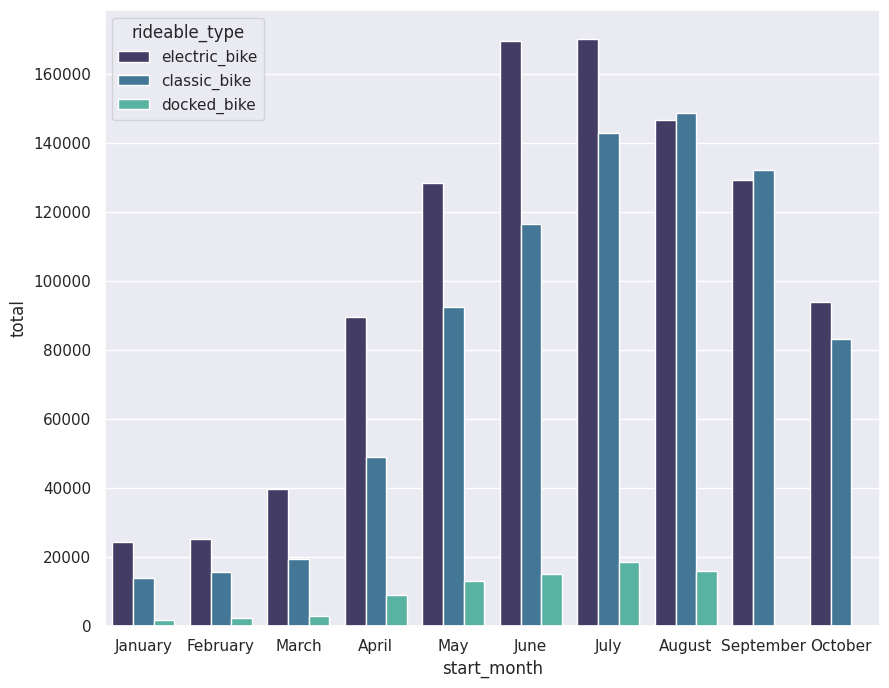

In [28]:
# Most used bikes by Casuals by month.
sns.barplot(bike_preference_month.query("member_casual == 'casual'"),
            x = "start_month", 
            y = "total", 
            hue = "rideable_type",
            order= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"],
            palette = "mako")
sns.move_legend(casual_bike_type_plot, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)